# <center> Predicting Star Size | Linear Regression
---

<center> <img src = 'https://drive.google.com/uc?id=1Wr3rLlNCBU5qjr1s7o1l-O3DjgLDZIJi' width = 100%>

---

## <center> Linear Regression from Scratch

---
    


**Recall the following topics before we start today's session:-**        
**1)** Supervised Learning - When we train the ML algorithms with labeled data.       
**2)** Forward Propagation - Consists of two steps which are computing the predicted output and the cost function.         
**3)** Backpropagation - Consists of optimization algorithm which will be used to update the model parameters.         
**4)** Training - For each epoch we calculate the loss and then update the model parameters.            
**5)** Testing - Using new inputs whose respective outputs if we know, we can check how our model is performing.         

    
**Python Libraires that we need today:-**           
**1)** NumPy       
**2)** Matplotlib        
**3)** Pandas
    
                                

## Generating the Data for Linear Regression


In [ ]:
# Importing Libraries (numpy and pyplot)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

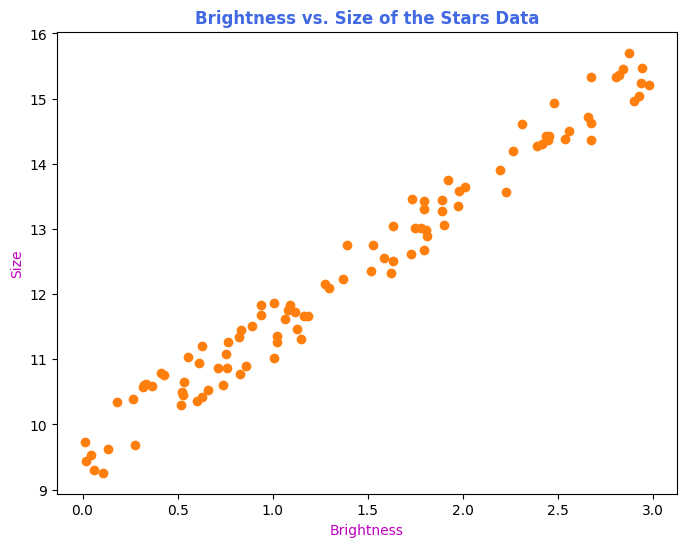

In [ ]:
# Use seed value of 100 so that everyone gets the same output!
np.random.seed(100)

# Generating Randomized dataset --> X_train and y_train
'''
X_train = 3*random numbers between 0 and 1 of shape (100, 1)
y_train = 9 + 2*X_train + noise, where noise is a random number between 0 and 1 and its shape is (100, 1)
The noise will allow to have some randomness in output instead of it simply being in a straight line

Our goal of this session is to train ML model --> Linear Regression to predict the values of 9 and 2 in y_train
In reality, we don't have y_train formula. Hence, we make ML model to predict what should be the formula!
'''

# Preparing data using above comments
X_train = 3*np.random.random(size=(100, 1)) # Brightness of 100 stars
noise = np.random.random(size=(100, 1))     # Adding noise for randomness in the output of brightness
y_train = 2*X_train + 9 + noise             # Prediction equation for Size of the star based on inputs of brightness

# Scatter plot --> Figsize is (8,6), Xlabel is brightness, ylabel is Size, add title
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='tab:orange')
plt.xlabel('Brightness', color='m')
plt.ylabel('Size', color='m')
plt.title('Brightness vs. Size of the Stars Data', weight='bold', color='royalblue')
plt.show()

In [ ]:
# Print first 5 values in X_train and y_train
print('First 5 values in X_train:-')
print(X_train[:5])

print('\nFirst 5 values in y_train:-')
print(y_train[:5])

First 5 values in X_train:-
[[1.63021483]
 [0.83510816]
 [1.27355277]
 [2.5343284 ]
 [0.01415657]]

First 5 values in y_train:-
[[13.03871887]
 [11.44981471]
 [12.1574337 ]
 [14.37765714]
 [ 9.72604804]]


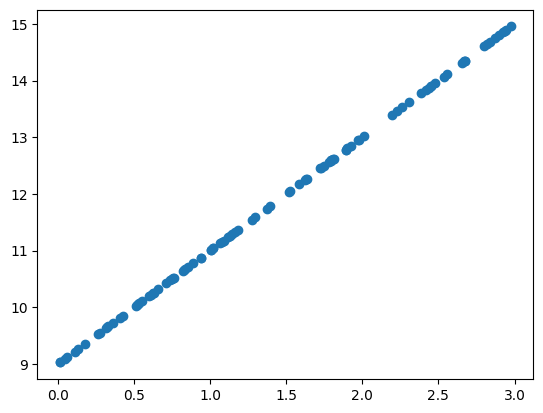

In [ ]:
# Check what happens if you remove the noise! --> Remove noise from the y_train and plot again
plt.scatter(X_train, 2*X_train + 9)
plt.show()

## Model Parameters and Hyperparameters

Remember that instead of using gradient and y-intercept, we will be using the actual model parameters for ML algorithms - Weight and Bias!

In [ ]:
# Initialise the weight (W) and bias (b) to 0
W = 0
b = 0

# Hyperparameters --> Choose approproate learning_rate (0.01)
learning_rate = 0.01

<img src = "https://drive.google.com/uc?id=1mFaXv4XF-_b-jyP_MK2vfgYfB2dVd4RZ">

## Computing equations for the forward propagation

In [ ]:
# Create a function for Predicted Output
def predict(X, W, b):
    '''
    X - Inputs
    W - Weight
    b - Bias

    Returns - Predicted output
    '''
    return W*X + b

# MSE cost function
def cost_function(X, y, W, b):
    '''
    y - target values / true values
    Returns - MSE
    '''
    y_cap = predict(X, W, b)
    return np.mean((y - y_cap)**2)

In [ ]:
# Test the cost_function
cost_function(X_train, y_train, W, b)

155.64746471475698

<img src = 'https://drive.google.com/uc?id=1ZlXFrHr4ix4w2ND9e1QMZqaMuplh-PTh'>

## Computing equations for the backpropagation


In [ ]:
def update_params(X, y, W, b, learning_rate):
    '''
    This function computes all the equations needed for the backpropagation in Linear Regression
    '''

    # Calculate the y_cap
    y_cap = predict(X, W, b)

    # Compute the partial derivatives
    dJdW = np.mean(-2 * X * (y - y_cap))
    dJdb = np.mean(-2 * (y - y_cap))

    # Gradient Descent
    W = W - learning_rate * dJdW   # W -= learning_rate * dJdW
    b = b - learning_rate * dJdb   #   b -= learning_rate * dJdb

    return W, b

In [ ]:
# Test the update_params function
update_params(X_train, y_train, W, b, learning_rate)

(0.37996848499034985, 0.2470683141174928)

In [ ]:
# Epoch by epoch train the linear regression to get the best value for W and b
def train(X, y, W, b, learning_rate, tol=1e-13, verbose=False):
    '''
    This function trains the linear regression epoch by epoch
    tol - Threshold for when the training should stop based on convergence
    verbose - Display the training if it is set to True
    '''

    # Empty list for costs, and lists with initital values for weights and biases
    costs = []
    weights = [W]
    biases = [b]

    # Counter to track the epochs
    ct = 0

    # While Loop for Training
    while True:

      # 1) To Calculate the Predicted value and Cost and store the cost value in costs list
      cost = cost_function(X, y, W, b)
      costs.append(cost)

      # 2) Give the condition to stop the training if the costs are converging correct to 13 dp
      if ct >= 1 and abs(costs[-1] - costs[-2]) < tol:
        break

      # 3) Update the model params
      W, b = update_params(X, y, W, b, learning_rate)
      weights.append(W)
      biases.append(b)

      # 4) Display the values of weights, biases and costs after every 100 epochs
      if verbose and ((ct+1)%100==0):
        print(f'After {ct+1} epochs:- W = {W}, b = {b}, cost = {cost}')

      # 5) Update the counter value by 1
      ct = ct + 1   # ct += 1

    return weights, biases, costs, ct

In [ ]:
# Train the linear regression model
weights, biases, costs, iteration_count = train(X_train, y_train, W, b, learning_rate, verbose=True)

After 100 epochs:- W = 4.3222942048210085, b = 5.327063373770924, cost = 5.059233469917248
After 200 epochs:- W = 3.51412009319501, b = 6.7890242662687115, cost = 2.2086697160039885
After 300 epochs:- W = 2.9835540281786326, b = 7.743346998568343, cost = 0.9907861469991488
After 400 epochs:- W = 2.6367501624690695, b = 8.367135449635883, cost = 0.4704415777246173
After 500 epochs:- W = 2.410063191668252, b = 8.77487229347111, cost = 0.24812273077542904
After 600 epochs:- W = 2.2618901532412243, b = 9.041387862566092, cost = 0.15313630711057427
After 700 epochs:- W = 2.1650374349793493, b = 9.215594706132114, cost = 0.11255306010092578
After 800 epochs:- W = 2.101730040231323, b = 9.329464317758527, cost = 0.09521374070874238
After 900 epochs:- W = 2.0603494130098348, b = 9.403894737290441, cost = 0.08780546219143534
After 1000 epochs:- W = 2.0333011303240744, b = 9.452545885499076, cost = 0.08464025199208187
After 1100 epochs:- W = 2.015621127738976, b = 9.484346515361228, cost = 0.083

In [ ]:
# Comparing initial and final values
initial = [weights[0], biases[0], costs[0]]
final = [weights[-1], biases[-1], costs[-1]]
df = pd.DataFrame(list(zip(initial,final)),
                  columns = ['Initial', 'Final'],
                  index = ['Weight', 'Bias', 'Cost'])
df

,Initial,Final
Weight,0.000000,1.982259
Bias,0.000000,9.544355
Cost,155.647465,0.082279


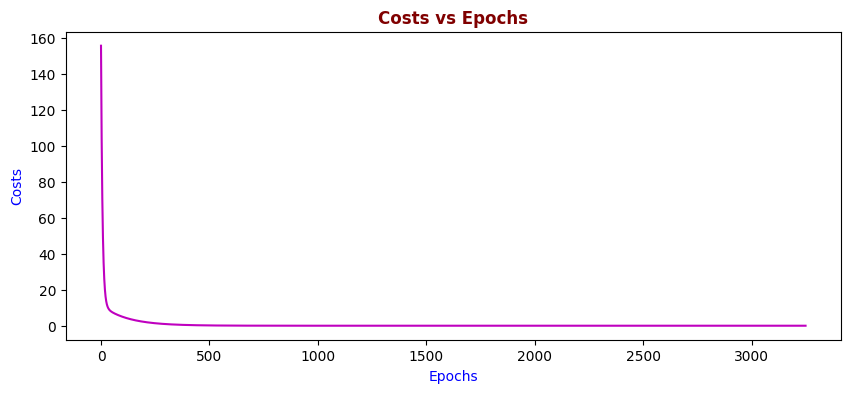

In [ ]:
# Visualising the cost wrt epochs
plt.figure(figsize=(10, 4))
plt.plot(costs, color='m')
plt.xlabel('Epochs', color='blue')
plt.ylabel('Costs', color='blue')
plt.title('Costs vs Epochs', weight='bold', color='maroon')
plt.show()

In [ ]:
# Define a seed value (using different seed value compared to trianing set to avoid data leakage!) --> 5007
np.random.seed(5007)  # This number was choose to get the optimal results with random values

# Test data
X_test = 3*np.random.rand(10,1)
y_test = 9 + 2*X_test + np.random.rand(10,1)

prediction = predict(X_test, weights[-1], biases[-1])

# DataFrame to compare true and predicted outputs on test inputs
df1 = pd.DataFrame(list(zip(X_test.reshape(10,), y_test.reshape(10,), prediction.reshape(10,))),
                  columns = ['Test Input', 'True Output', 'Predicted Output'])
df1

,Test Input,True Output,Predicted Output
0,0.723836,10.889388,10.979186
1,1.900129,13.358554,13.310902
2,0.126943,9.974414,9.795988
3,2.026471,13.566160,13.561344
4,2.647429,14.842352,14.792244
5,1.238825,12.071978,12.000027
6,1.561243,12.881255,12.639142
7,2.042729,13.622504,13.593573
8,1.230220,12.098017,11.982969
9,0.382516,10.325675,10.302601


In [ ]:
# Calculate the mean sqaured error to evaluate the performance
mse = np.mean((y_test - prediction)**2)
print(f'The Means Squared Error:- {round(mse, 3)} (3dp).')

The Means Squared Error:- 0.012 (3dp).


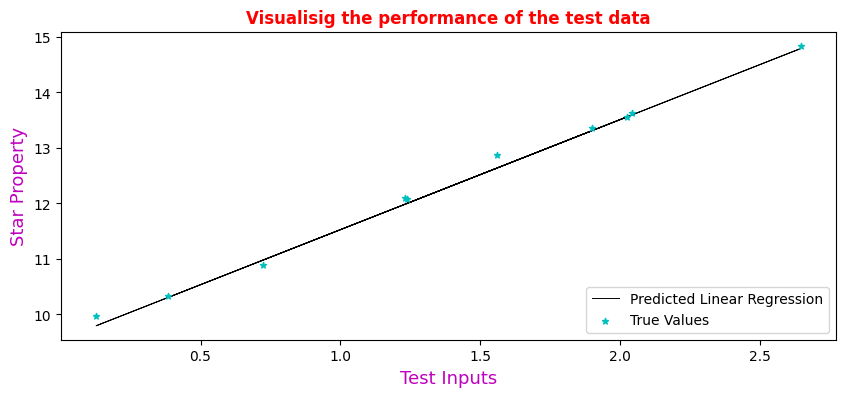

In [ ]:
# Visualise the performance of the test data --> (10, 4) figsize, plot(X_test, prediction) and (X_test, y_test)
# Customize it
plt.figure(figsize = (10,4))
plt.plot(X_test, prediction, color="k", linewidth = 0.7)
plt.scatter(X_test, y_test, color="c", marker = '*', s = 20, zorder = 2)
plt.title("Visualisig the performance of the test data", color = 'red', weight = 'bold')
plt.xlabel("Test Inputs", color = 'm', fontsize = 13)
plt.ylabel("Star Property", color = 'm', fontsize = 13)
plt.legend(['Predicted Linear Regression', 'True Values'], loc='lower right')
plt.show()

---

## <center> Linear Regression using Scikit-Learn library

---

- Linear regression is a foundational algorithm in machine learning.
- It is used for predicting a continuous target variable based on one or more input features.
- Scikit-learn's `LinearRegression` module provides a straightforward way to implement this technique.
- However, it uses Ordinary Least Square Regression to get the line of best fit.

Let us compare our Gradient Descent method with sklearn's Ordinary Least Square Regression method...


#### Step 1: Input Data

**Gather your data:-**
- You need a dataset with input features (independent variables) and corresponding target values (dependent variable).
- Both of this data already defined for our usecase.

In [ ]:
# Training data - first 5 sample
print('First 5 Independent Feature:-\n', X_train[:5])
print()
print('Rescpective Dependent Feature:-\n', y_train[:5])

First 5 Independent Feature:-
 [[1.63021483]
 [0.83510816]
 [1.27355277]
 [2.5343284 ]
 [0.01415657]]

Rescpective Dependent Feature:-
 [[13.03871887]
 [11.44981471]
 [12.1574337 ]
 [14.37765714]
 [ 9.72604804]]


In [ ]:
# Testing data - first 5 sample
print('First 5 Independent Feature:-\n', X_test[:5])
print()
print('Rescpective Dependent Feature:-\n', y_test[:5])

First 5 Independent Feature:-
 [[0.72383636]
 [1.90012877]
 [0.12694282]
 [2.0264709 ]
 [2.64742922]]

Rescpective Dependent Feature:-
 [[10.88938808]
 [13.35855419]
 [ 9.97441367]
 [13.56616042]
 [14.84235246]]


#### Step 2: Import and Initialize

**Import the necessary modules:-**
- Import the `LinearRegression` class from scikit-learn's `linear_model` module.
- [Here](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/linear_model/_base.py) is the official code from sklearn. Just press `ctrl+f` and search for `LinearRegression`.

**Create a model instance:-**
- Initialize a LinearRegression object.
- This represents the linear relationship between the inputs and the target.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Build the sklearn model of linear regression
sklearn_model = LinearRegression(fit_intercept=True,  # If true include intercept
                                 copy_X=True,         # If true reserve a copy of X so that it remains unchanged
                                 n_jobs=None,         # If none, single CPU core, no parallelization used
                                 positive=False)      # If true, forces the coefficients to be positive

#### Step 3: Training

**Fit the model:-**
- Use the `fit()` method of the model to train it on your data.
- The algorithm learns the coefficients and intercept that define the linear relationship.

**Learning process:-**
- The algorithm internally uses the least squares optimization method.
- It is used to minimize the sum of squared differences between the actual target values and the predicted values.

In [ ]:
# Using fit command of sklearn on model I can train it
sklearn_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Scikit-Learn model:-')
print('Optimal Weight = {}'.format(sklearn_model.coef_[0][0]))
print('Optimal Bias = {}'.format(sklearn_model.intercept_[0]))

print()

print('Scratch model:-')
print('Optimal Weight = {}'.format(weights[-1]))
print('Optimal Bias = {}'.format(biases[-1]))

Scikit-Learn model:-
Optimal Weight = 1.9822550788964692
Optimal Bias = 9.544361289912072

Scratch model:-
Optimal Weight = 1.9822586835574079
Optimal Bias = 9.544354806288116


#### Step 4: Prediction

**Make predictions:-**
- Once the model is trained, you can use the `predict()` method to make predictions on new data points.
- The model applies the learned linear relationship to these inputs.

In [ ]:
predictions = sklearn_model.predict(X_test)
mse_skl = np.mean((y_test - predictions)**2)
print(f"The MSE value of sklearn model:- {round(mse_skl, 5)} (5dp)")
print(f"The MSE value of scratch model:- {round(mse, 5)} (5dp)")

The MSE value of sklearn model:- 0.01231 (5dp)
The MSE value of scratch model:- 0.01231 (5dp)


* Both the Gradient Desecent and Ordinary Least Square Regression methods are performing well!

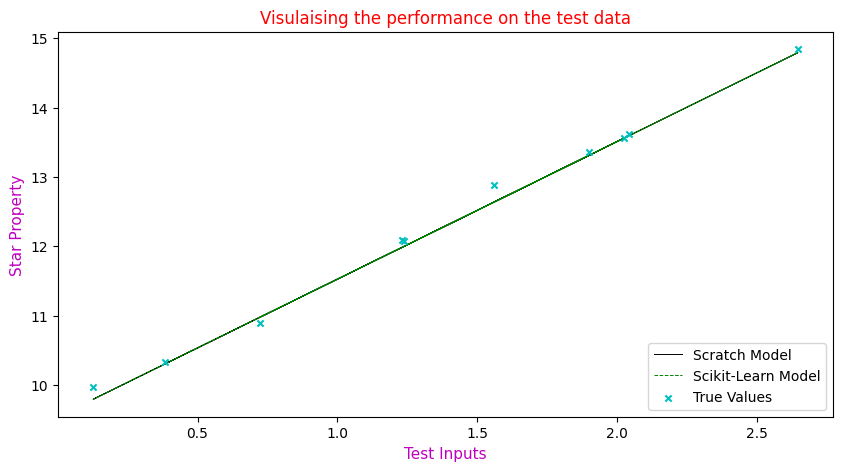

In [ ]:
# Visualise the performance of the test data
plt.figure(figsize = (10,5))
plt.plot(X_test, prediction, color="k", label="predicted", linewidth = 0.7)
plt.plot(X_test, predictions,  "g--", label="predicted", linewidth = 0.7)
plt.scatter(X_test, y_test, color="c", label="original", marker = 'x', s = 20, zorder = 2)
plt.title(f"Visulaising the performance on the test data", color = 'red')
plt.xlabel("Test Inputs", color = 'm', fontsize = 11)
plt.ylabel("Star Property", color = 'm', fontsize = 11)
plt.legend(['Scratch Model', 'Scikit-Learn Model', 'True Values', ], loc = 'lower right')
plt.show()

* Just look at how similar predictions we are getting!
* Now that you have learnt gradient descent algorithm, it will be very useful in some of the upcoming lectures.

### Advantages of Linear Regression in scikit-learn


- Linear Regression is easy to understand and implement.
- For small datasets, it provides quick and accurate predictions.
- It's a fundamental step towards understanding more complex machine learning techniques.



### Limitations and Considerations

- It assumes a linear relationship between inputs and target.
- It doesn't capture non-linear relationships between variables.
- Outliers can disproportionately affect the model's performance.

<img src='http://cdn-0.r-statistics.co/screenshots/outliers_effect.png' width=75%>


### Ending Notes
- Remember, while Linear Regression is powerful, it's just the beginning.
- Machine learning offers a vast array of algorithms for different tasks, each with its strengths and weaknesses.
- We shall dive deeper into this exciting field to explore more advanced techniques in the upcoming days.

---